## Skoltech
## Intro to data science, fall 2020
## Assigment 2

### Goals
- Make exploratory data analysis
- Apply feature engineering and feature selection
- Try to solve classification task and use classification performance metrics
- Get the taste of gradient boosting approach


# Submiting the answers

Google form to submit your answers: https://docs.google.com/forms/d/1zwUO1KZNDTZYuD12dyMO3CaErGHnZuHx1Mdbo-c11ME/

Use your **skoltech email**. For Name, Surname use **exactly the same spelling** as in canvas system.

---

If your answer is a ``float number``, then it must be provided with **3 decimals after the floating point**, e.g. 1.234

---

If your answer is a ``list of float or integer numbers or str``, then they should be reported in descending (alphabetical) order,  divided by a comma, e.g.:

10.453,9.112,5.001,5.000

---

The last part (Q5) do not have corresponding fields in the google form. It is **not optional** and it will be graded manually from your .ipynb file.

---

If you have any questions regarding this Home Assignment, ask them piazza topic: https://piazza.com/class/kespugtqfrn12g?cid=29

#### Import basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

### Dataset
For the task we'll use kickstarter dataset. Kickstarter is the crowdfounding platform, where people can announce their project with financial goals and other can support the projects by paying the money ("pledging"). The goal will be to predict if the project will be successfull, i.e. would it achieve the funding goal. Let's take a brief look to the dataset.

In [2]:
df = pd.read_csv('ks-projects-201801.csv')
df.set_index("ID", inplace=True)

In [3]:
df.sample(5)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
474694524,My amazingly famous so totally badass gourmet ...,Food,Food,USD,2015-02-03,100.0,2015-01-14 04:43:34,0.0,failed,0,US,0.0,0.0,100.0
1248234253,Three Days at Foster,Documentary,Film & Video,USD,2012-08-09,10000.0,2012-07-10 06:08:37,12255.0,successful,87,US,12255.0,12255.0,10000.0
2109578921,Unwoman Dance Remix Project,Indie Rock,Music,USD,2010-11-10,900.0,2010-10-12 21:18:42,1527.0,successful,46,US,1527.0,1527.0,900.0
354237438,7409 2nd Ave Apartment B2,Graphic Design,Design,USD,2015-02-19,28.0,2015-01-15 22:00:06,1672.0,successful,62,US,1672.0,1672.0,28.0
820520575,VitoSpace,Technology,Technology,USD,2014-09-05,3500.0,2014-08-26 02:53:10,0.0,failed,0,US,0.0,0.0,3500.0


In [4]:
df.shape

(378661, 14)

In [5]:
df.state.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

# Section 1. Dataset acquaintance

-----

### Q1.1

#### How many NaN values are there in the dataset?

In [7]:
df.shape[0] - df.count()  #3801 

name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

----

In [8]:
df.dropna()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00


In [9]:
df.shape

(378661, 14)

In [8]:
df.state.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

----

Let us simplify the task a little bit: we are aiming to predict either project fails or not.
Thus 'success' projects will be encoded as 1, with state ['failed', 'canceled'] as 0 and we remove the rows with any other state.

### Q1.2 
#### How many '1' values are in resulting dataset (in state column)?

In [10]:
cond1 = df.state == 'live' 
cond2 = df.state == 'suspended' 
cond3 = df.state == 'undefined' 

todrop = df[cond1 | cond2 | cond3].index

df.drop(todrop, inplace = True)

df.state = (df.state == 'successful').astype(int)

df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,1283.0,1283.0,19500.00


In [11]:
df.state.value_counts()  #133956

0    236498
1    133956
Name: state, dtype: int64

-----

------

### Q1.3
#### Whats is a name of a project attracted the biggest pay check? (on average). Use column usd_pledged_real to judge. If there are multiple projects, choose any single one.

In [12]:
#df['avg_check'] = df.usd_pledged_real/df.backers

dfcopy = df.drop(df[df.backers == 0].index)

dfcopy['avg_check'] = dfcopy.usd_pledged_real/dfcopy.backers

dfcopy.avg_check.sort_values()

ID
1794731243        0.45
1466342924        0.47
52860221          0.48
210794368         0.48
802284581         0.49
                ...   
1974395971    10000.00
281085395     10000.00
2024799289    10000.00
1459482568    10000.00
472233286     10000.00
Name: avg_check, Length: 319572, dtype: float64

In [13]:
dfcopy.loc[1459482568]

name                Patented (9 seasons) food enhancer
category                                         Vegan
main_category                                     Food
currency                                           USD
deadline                                    2016-02-22
goal                                            150000
launched                           2016-01-23 00:02:15
pledged                                          10000
state                                                0
backers                                              1
country                                             US
usd pledged                                      10000
usd_pledged_real                                 10000
usd_goal_real                                   150000
avg_check                                        10000
Name: 1459482568, dtype: object

-----

-----

### Q1.4
#### What is the most successful main category (in terms of success percentage)?

In [14]:
df.groupby('main_category')['state'].mean().sort_values()

main_category
Technology      0.202550
Journalism      0.216610
Crafts          0.244198
Fashion         0.249409
Food            0.250773
Photography     0.309602
Publishing      0.315005
Design          0.357433
Games           0.360510
Film & Video    0.379291
Art             0.413093
Music           0.491270
Comics          0.544963
Theater         0.602212
Dance           0.625803
Name: state, dtype: float64

-----

-----

### Q1.5
#### Define the category with highest goal per project. How many projects belong to it?  (note: we use category here, not main_category)

In [17]:
gp1 = df.groupby('category')['goal'].sum()

gp1

category
3D Printing     31731427.0
Academic        51508835.0
Accessories     58565631.0
Action         247877566.0
Animals          2929691.0
                  ...     
Woodworking     14620002.0
Workshops        2063155.0
World Music     62628409.5
Young Adult    120614302.0
Zines            4024676.0
Name: goal, Length: 159, dtype: float64

In [31]:
gp2 = df.groupby('category')['category'].count()

gp2

category
3D Printing     659
Academic        892
Accessories    3080
Action          730
Animals         247
               ... 
Woodworking    1150
Workshops       158
World Music    2083
Young Adult     806
Zines           381
Name: category, Length: 159, dtype: int64

In [29]:
(gp1/gp2).sort_values()    #Movie Theaters 227 projects

category
Crochet              3.781049e+03
Taxidermy            4.187636e+03
Stationery           4.213168e+03
Poetry               5.342948e+03
Candles              5.678515e+03
                         ...     
Science Fiction      4.299817e+05
Architecture         4.765797e+05
Fantasy              6.216058e+05
Space Exploration    6.245547e+05
Movie Theaters       1.594601e+06
Length: 159, dtype: float64

In [33]:
gp2['Movie Theaters']

227

-----

-----

### Q1.6
#### What is the category with biggest total pledge? Use 'usd_pledged_real' to judge.

------

In [16]:
df.groupby('category')['usd_pledged_real'].sum().sort_values()

category
Taxidermy          3.742699e+04
Crochet            4.820144e+04
Embroidery         9.480322e+04
Quilts             1.704812e+05
Literary Spaces    1.891494e+05
                       ...     
Documentary        1.387601e+08
Hardware           1.568550e+08
Video Games        2.157734e+08
Tabletop Games     4.625972e+08
Product Design     6.284495e+08
Name: usd_pledged_real, Length: 159, dtype: float64

------

As one can notice, there are both numerical and object-type data in our dataframe. 

We suggest you to split them to perform EDA separately. 

### Q1.7
#### Split columns to 'numeric' (by data type) and object-type. How many 'object-type' features are there?

In [17]:
df.dtypes

name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                 int64
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [46]:
numeric = ['goal','pledged','state','backers','usd pledged','usd_pledged_real','usd_goal_real']

In [47]:
abc = list(df.columns)

for i in numeric:
    abc.remove(i)
    
abc

['name',
 'category',
 'main_category',
 'currency',
 'deadline',
 'launched',
 'country']

In [51]:
len(abc)

7

### Q1.8
#### Let's do a bit of feature engineering. Let's create column 'pledge2goal' which define as ratio of usd_pledged_real to goal. How many outliers are there?
#### (We use a simple rule: an object is an outlier if it does not belong to [q25 - 1.5iqr, q75 + 1.5 iqr] interval, where qxx -- xx quantile, and iqr is inter-quantile range.)

In [52]:
df['pledge2goal'] = df.usd_pledged_real/df.goal

q25 = df.pledge2goal.quantile(0.25)

In [53]:
q75 = df.pledge2goal.quantile(0.75)

In [54]:
iqr = q75 - q25 

cond1 = df.pledge2goal > q25 - 1.5*iqr
cond2 = df.pledge2goal < q75 + 1.5*iqr

df[cond1 & cond2].shape

(352038, 15)

In [190]:
df.shape[0] - df[cond1 & cond2].shape[0]

18416

In [55]:
df.pledge2goal

ID
1000002330    0.000000
1000003930    0.080700
1000004038    0.004889
1000007540    0.000200
1000011046    0.065795
                ...   
999976400     0.000500
999977640     0.103333
999986353     0.001333
999987933     0.013333
999988282     0.262000
Name: pledge2goal, Length: 370454, dtype: float64

In [59]:
q25 - 1.5*iqr

-1.5973935684019367

### Q1.9
#### Visualize the feature for success and fail cases. What can you say about received distributions? (use bins=10 or 20). Type letter as your answer
- A. Distributions intersect significantly, hard to say for sure that the ratio matters.
- B. Distributions have almost no intersection, the bigger ratio, the bigger success.
- C. Distributions intersect significantly, the bigger ratio, the bigger success
- D. Distributions have almost no intersection, the less ratio, the bigger success.

(array([236498.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 133956.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

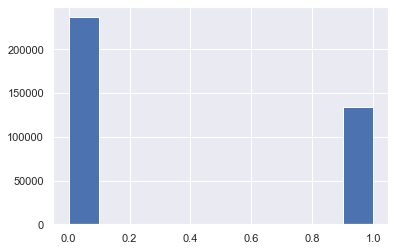

In [111]:
plt.hist(df.state, bins=10)

-----

-----

### Q1.10
#### Continue with plot from Q1.9. Where are the peaks located? We expect two numbers here as the answer

-----

-----

### Q1.11
#### Compute Pearson correlation coefficient between the pledge2real and target variable.

----

-----

### Q1.12
#### Visualize dependancy of numerical data with success. What can you say about it?

# Feature generation
Lets' generate some more feature that could be useful

### Q2.1 Create a year column that would hold the year. How many projects were in year 2012?

In [169]:
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,pledge2goal,year,deadline_date,launched_date,duration_days,region,name_length
ID,,,,,,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95,0.000000,2015,2015-10-09,2015-08-11,58 days 11:47:32,Europe,31.0
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00,0.080700,2017,2017-11-01,2017-09-02,59 days 19:16:03,America,45.0
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00,0.004889,2013,2013-02-26,2013-01-12,44 days 23:39:10,America,14.0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00,0.000200,2012,2012-04-16,2012-03-17,29 days 20:35:49,America,49.0
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,1283.0,1283.0,19500.00,0.065795,2015,2015-08-29,2015-07-04,55 days 15:24:57,America,58.0


In [188]:
df['deadline_date'] = pd.to_datetime(df.deadline)
df['launched_date'] = pd.to_datetime(df.launched).dt.normalize()

In [189]:
df['year'] = df.launched_date.dt.year

In [190]:
cond = df.year == 2012  #41111
df[cond].shape

(41111, 21)

### Q2.2 Make a column 'duration_days' with number of full days from launch to deadline.
What is median value for this column?

In [191]:
df['duration_days'] = df.deadline_date - df.launched_date

In [193]:
df.duration_days.median()

Timedelta('30 days 00:00:00')

### Q2.3 Delete mistaken value from column 'country'. What is the value?

In [194]:
df.country.value_counts()

US    289671
GB     33215
CA     14508
AU      7681
DE      4057
FR      2873
NL      2807
IT      2775
ES      2204
SE      1718
MX      1632
NZ      1425
DK      1083
IE       793
CH       736
NO       694
BE       597
AT       576
HK       564
SG       521
LU        61
JP        31
Name: country, dtype: int64

In [195]:
cond = df.country == 'N,0"'

df.drop(df[cond].index, axis = 0, inplace = True)

### Q2.4 Make column 'region' out of column country (america, europe, asia, oceania(including australiza/nz))
Where is the region with the worst conversion rate (percentage of successful projects)

In [196]:
'''
America: US CA MX

Europe: GB DE FR NL IT ES SE DK IE CH NO BE AT LU

Asia: HK SG JP

Oceania: AU NZ 

'''

def reg(x):
    if x in ['US','CA','MX']:
        return 'America'
    elif x in ['HK','SG','JP']:
        return 'Asia'
    elif x in ['AU','NZ']:
        return 'Oceania'
    else:
        return 'Europe'
    
df['region'] = df.country.apply(reg)

df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,pledge2goal,year,deadline_date,launched_date,duration_days,region,name_length
ID,,,,,,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95,0.000000,2015,2015-10-09,2015-08-11,59 days,Europe,31.0
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00,0.080700,2017,2017-11-01,2017-09-02,60 days,America,45.0
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00,0.004889,2013,2013-02-26,2013-01-12,45 days,America,14.0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00,0.000200,2012,2012-04-16,2012-03-17,30 days,America,49.0
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,1283.0,1283.0,19500.00,0.065795,2015,2015-08-29,2015-07-04,56 days,America,58.0


In [197]:
df.groupby('region')['state'].mean().sort_values()  #oceania

region
Oceania    0.269932
Europe     0.316725
Asia       0.359319
America    0.372220
Name: state, dtype: float64

### Q2.5 For each main_category leave only the three most popular category and replace other with "other"
What is the most frequent subcategory for design?

In [198]:
df.groupby('main_category')['category'].value_counts()

main_category  category    
Art            Art             8155
               Painting        3263
               Illustration    3125
               Public Art      3060
               Mixed Media     2734
                               ... 
Theater        Festivals        546
               Experimental     368
               Immersive        323
               Spaces           212
               Comedy            96
Name: category, Length: 170, dtype: int64

### Q2.6 create the columns "name_length" with length of the name.
What is the biggets length?

In [199]:
df['name_length'] = df.name.str.len()

In [206]:
pd.options.display.max_columns = 30

df.head()

,category,main_category,currency,goal,state,year,deadline_date,launched_date,duration_days,region,name_length
ID,,,,,,,,,,,
1000002330,Poetry,Publishing,GBP,1000.0,0,2015,2015-10-09,2015-08-11,59 days,Europe,31.0
1000003930,Narrative Film,Film & Video,USD,30000.0,0,2017,2017-11-01,2017-09-02,60 days,America,45.0
1000004038,Narrative Film,Film & Video,USD,45000.0,0,2013,2013-02-26,2013-01-12,45 days,America,14.0
1000007540,Music,Music,USD,5000.0,0,2012,2012-04-16,2012-03-17,30 days,America,49.0
1000011046,Film & Video,Film & Video,USD,19500.0,0,2015,2015-08-29,2015-07-04,56 days,America,58.0


# Preprocessing

### Q3.1 Drop the leaking columns
Based on what we have already seen, can you assume what features are leakeges? What is the columns? Drop them


In [204]:
leakage = ['usd_pledged_real','pledge2goal','usd pledged','backers','pledged']

df.drop(leakage, axis = 1, inplace = True)

### Q3.2 Deal with the categorical features.
Lets drop some more columns for now (name, deadline, launched, country, usd_goal_real). Note: you can re-use these columns in the Q5 section. 
Preprocess the rest of categorical columns. How many columns do you have now?

In [205]:
categorical = ['name','deadline','launched','country','usd_goal_real']

df.drop(categorical, axis = 1, inplace = True)

In [207]:
df.head()

,category,main_category,currency,goal,state,year,deadline_date,launched_date,duration_days,region,name_length
ID,,,,,,,,,,,
1000002330,Poetry,Publishing,GBP,1000.0,0,2015,2015-10-09,2015-08-11,59 days,Europe,31.0
1000003930,Narrative Film,Film & Video,USD,30000.0,0,2017,2017-11-01,2017-09-02,60 days,America,45.0
1000004038,Narrative Film,Film & Video,USD,45000.0,0,2013,2013-02-26,2013-01-12,45 days,America,14.0
1000007540,Music,Music,USD,5000.0,0,2012,2012-04-16,2012-03-17,30 days,America,49.0
1000011046,Film & Video,Film & Video,USD,19500.0,0,2015,2015-08-29,2015-07-04,56 days,America,58.0


In [211]:
df.category.nunique()

159

### Q3.3 Split the dataset
Separate the target column (state) without stratification and with random state 42 and test size 0.2. How many of successful projects in train set?

### Q3.4 Scale the numeric columns with standard scaler
What is max number in goal field after scaling?

# Feature selection

### Q4.1 Estimate feature importance by Anova
What is the two most important features by anova with f classifier?

------

------

## Build a model with logistic regression

Use l2 penalty and search for optimal C in np.logspace(-2, 4, 7).

### Q4.2 What is an optimal C for l2 regularization?

### Q4.3 What is the accuracy for this params?

### Q4.4 What is the two most important features by logistic regression estimation?

### Q4.5 Build roc curve and calculate roc-auc score. What is the roc-auc score?


------

------

## Build a random forest model
Use random state 42, maximum depth from 2 to 15, and number of estimators in `[10, 20, 50, 100, 200]`

### Q4.6 What is an optimal depth and number of trees?

### Q4.7 What is the accuracy for this params?

### Q4.8 Build precision-recall curve. What is the precision for recall 0.5?

### Q4.9 What is the two most important features by random forest?

------

------

# Build the stronger model

### Q5.1 Generate two (or more) meaningfull features

### Q5.2 Train an xgboost, that's beat random forest